<h1 style="color:#313658"> Deploy machine learning models on mobile and IoT devices

<center>
     <img src='https://miro.medium.com/max/1200/1*xjsEPItNww_khr8o2me-xg.png' width='46%' />


## Why TensorFlow ?


TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications. [more...](https://www.tensorflow.org)



## What is Keras ?

Keras is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. It also supports multiple backend neural network computation.     

Keras is relatively easy to learn and work with because it provides a python frontend with a high level of abstraction while having the option of multiple back-ends for computation purposes. [more...](https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras)




# What is TensorFlow Lite?


TensorFlow Lite is a set of tools that enables on-device machine learning by helping developers run their models on mobile, embedded, and IoT devices. [more...](https://www.tensorflow.org/lite/guide)

TensorFlow Lite is Google’s machine learning framework to deploy machine learning models on multiple devices and surfaces such as mobile (iOS and Android), desktops and other edge devices. Recently, we added support to run TensorFlow Lite models in a browser as well. In order to build apps using TensorFlow Lite, you can either use an off-the shelf model from TensorFlow Hub, or convert an existing TensorFlow Model to a TensorFlow Lite model using the converter. Once the model is deployed in an app, you can run inference on the model based on input data. [more...](https://blog.tensorflow.org/2021/11/on-device-training-in-tensorflow-lite.html)

In [1]:
from IPython.core.display import display, HTML, Javascript

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Oswald">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        
        body {
            font-family: "Open Sans", sans-serif;
            }        
        </style>
    </head>    
</html>
"""

HTML(html_contents)    

# TensorFlow Lite example apps


<div>    
    <div style="float:left; width:25%;  margin-right:4%">        
        <img src="https://www.tensorflow.org/lite/examples/object_detection/images/android_apple_banana.png"/> 
        <h4 style="padding-top: 10px; "> <center>  
            Object Detection :<a href="https://www.tensorflow.org/lite/examples/object_detection/overview">  more </a>
            </center> </h4>
    </div>
    <div style="float:left; width:37.6%; margin-right:4%">        
        <img src="https://storage.googleapis.com/download.tensorflow.org/example_images/movenet_demo.gif" /> 
        <img src="https://storage.googleapis.com/download.tensorflow.org/example_images/movenet_demo.gif" />
        <h4 style="padding-top: 10px; "> <center>
            Pose estimation : <a href="https://www.tensorflow.org/lite/examples/pose_estimation/overview">  more </a>
            </center> </h4>
    </div>
    <div style="float:left; width:23%; ">        
        <img src="https://www.tensorflow.org/lite/examples/text_classification/images/screenshot.gif" /> 
        <h4 style="padding-top: 10px; "> <center>  Text Classification : <a href="https://www.tensorflow.org/lite/examples/text_classification/overview"> more </a> </center> </h4>
    </div>
</div>

# How does it work ?

In order to deploy a TensorFlow Lite model with on-device training built-in, here are the high level steps:

- Build a TensorFlow model for training and inference

- Convert the TensorFlow model to TensorFlow Lite format

- Integrate the model in your Android app

- Invoke model training in the app, similar to how you would invoke model inference

[more...](https://blog.tensorflow.org/2021/11/on-device-training-in-tensorflow-lite.html)

---

# Context of this work

Tomato leaf disease detection using CNN.

# Objective

In this Notebook Trained and Converted into the CNN Model to Tensorflow Lite Model which can easily implemented in Cloud Platforms for Classification and Detection on raw images 

A CNN model as been Derived for using the own Architecture and it convert the model using the tensorflow Model Lib

In [2]:
#import all the requirements 
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

### Checking the GPU enable for Training the Model

In [3]:
#checking the GPU
!nvidia-smi

Fri Apr  8 12:08:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Hyperparameters for the future model

In [4]:
INIT_LR = 1e-3
BATCH_SIZE = 16
EPOCHS = 100
IMAGE_SIZE = 256
default_image_size = tuple((IMAGE_SIZE, IMAGE_SIZE))
image_size = 0
data_dir = "../input/tomatoleaf/tomato/val"
CHANNELS=3
AUTOTUNE = tf.data.AUTOTUNE

### Spliting the Dataset


In this Function is use for Perform the Spliting the images for training the Network



Seed Size = 123

This will helpfull for this Dataset Spliting easily for 10 classes 

In [5]:
#spliting the Dataset
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = ds.cardinality().numpy()
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [6]:
#dataset spliting into training and testing 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=default_image_size,
  batch_size=BATCH_SIZE
)


train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Found 1000 files belonging to 10 classes.


2022-04-08 12:08:59.793611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 12:08:59.880953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 12:08:59.881667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 12:08:59.884420: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
#checking the avaiable classes
class_names = dataset.class_names
n_classes = len(class_names)
print(n_classes, class_names)

10 ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


### Displaying the sample images from the dataset

2022-04-08 12:09:02.395256: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


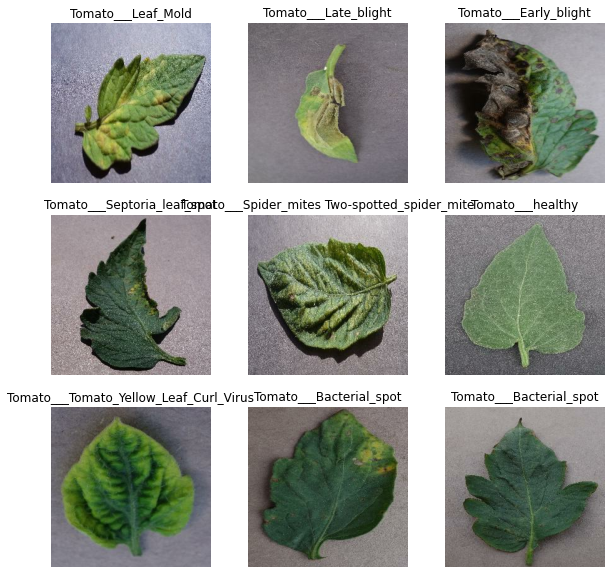

In [8]:
#Displaying the sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
#checking the batch Size
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 256, 256, 3)
(16,)


In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

## Creating a Layer for Resizing and Normalization

In [11]:
#Creating a Layer for Resizing and Normalization
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

## Data Augmentation

In [12]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
chanDim = -1
if K.image_data_format() == "channels_first":
    input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    chanDim = 1

# Build TensorFlow Model Architecture

In [14]:
#CNN with softmax activation layer in last output layer
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=batch_input_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (16, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (16, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (16, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (16, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (16, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (16, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (16, 60, 60, 64)         

In [16]:
#Compiling the Model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Training the model

In [17]:
#Training the network
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/100


2022-04-08 12:09:12.742181: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 11s 50ms/step - loss: 2.3029 - accuracy: 0.1023 - val_loss: 2.2914 - val_accuracy: 0.1458
Epoch 2/100
50/50 [==============================] - 1s 21ms/step - loss: 2.2930 - accuracy: 0.1098 - val_loss: 2.2639 - val_accuracy: 0.2083
Epoch 3/100
50/50 [==============================] - 1s 21ms/step - loss: 2.2206 - accuracy: 0.1742 - val_loss: 2.1106 - val_accuracy: 0.1667
Epoch 4/100
50/50 [==============================] - 1s 21ms/step - loss: 2.0089 - accuracy: 0.2121 - val_loss: 2.2231 - val_accuracy: 0.1771
Epoch 5/100
50/50 [==============================] - 1s 21ms/step - loss: 1.9009 - accuracy: 0.2525 - val_loss: 1.8577 - val_accuracy: 0.2500
Epoch 6/100
50/50 [==============================] - 1s 21ms/step - loss: 1.8000 - accuracy: 0.2866 - val_loss: 2.3773 - val_accuracy: 0.2292
Epoch 7/100
50/50 [==============================] - 1s 22ms/step - loss: 1.7031 - accuracy: 0.3384 - val_loss: 1.9020 - val_accuracy: 0.3125
Epoch 8/100
50/50

In [18]:
#testing the CNN model
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating model accuracy
7/7 [==============================] - 1s 8ms/step - loss: 0.3446 - accuracy: 0.8571
Test Accuracy: 85.71%


# Plotting the accuracy Graph

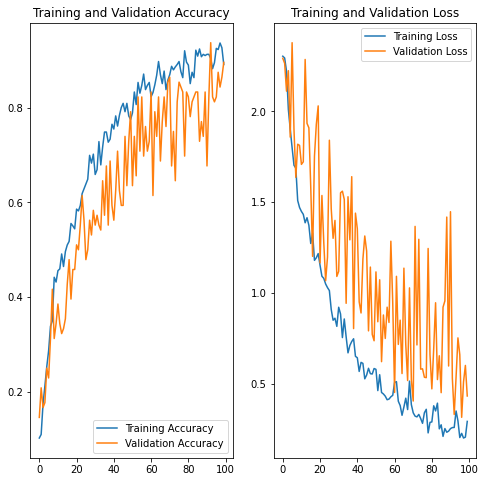

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
model.save("CNN.h5")

## Prediction function

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


first image to predict
actual label: Tomato___Septoria_leaf_spot
predicted label: Tomato___Septoria_leaf_spot


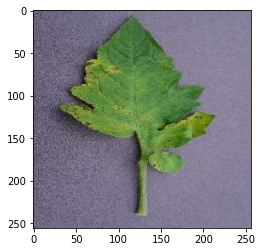

In [22]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

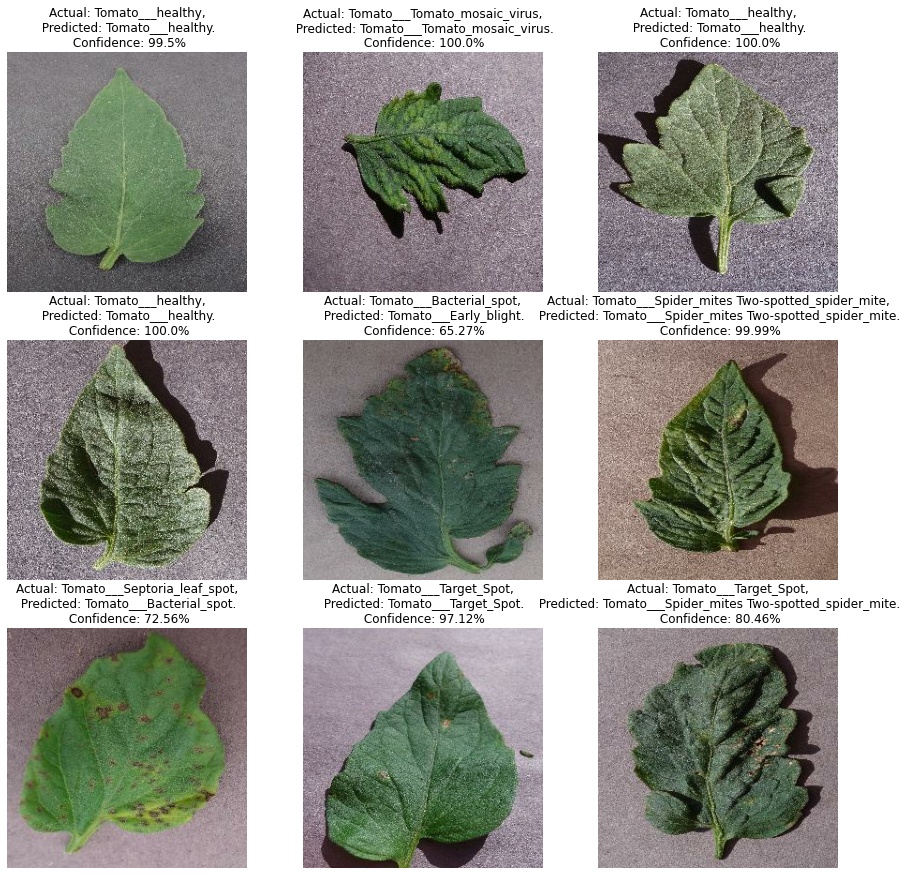

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

## Create a Quantization Aware Model

In [24]:
#Create a Quantization Aware Model
!pip install --upgrade tensorflow-model-optimization
import tensorflow_model_optimization as tfmot

     |████████████████████████████████| 237 kB 568 kB/s            


### Quantize only the Dense, MaxPool2D, Conv2D Layers

In [25]:
#Quantize only the Dense, MaxPool2D, Conv2D Layers
def apply_quantization(layer):
    if (
        isinstance(layer, layers.Dense)
        or isinstance(layer, layers.MaxPool2D)
        or isinstance(layer, layers.Conv2D)
    ):
        return tfmot.quantization.keras.quantize_annotate_layer(layer)
    return layer

In [26]:
annotated_model = tf.keras.models.clone_model(
    model,
    clone_function=apply_quantization,
)

quant_aware_model = tfmot.quantization.keras.quantize_apply(annotated_model)
quant_aware_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
quant_conv2d (QuantizeWrappe (None, 254, 254, 32)      963       
_________________________________________________________________
quant_max_pooling2d (Quantiz (None, 127, 127, 32)      1         
_________________________________________________________________
quant_conv2d_1 (QuantizeWrap (None, 125, 125, 64)      18627     
_________________________________________________________________
quant_max_pooling2d_1 (Quant (None, 62, 62, 64)        1         
_________________________________________________________________
quant_conv2d_2 (QuantizeWrap (None, 60, 60, 64)       

In [27]:
#Finr Tuning the model
quant_aware_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
q_history = quant_aware_model.fit(train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=25,
)

Epoch 1/25
50/50 [==============================] - 4s 42ms/step - loss: 0.3082 - accuracy: 0.8977 - val_loss: 0.4991 - val_accuracy: 0.8542
Epoch 2/25
50/50 [==============================] - 2s 37ms/step - loss: 0.3320 - accuracy: 0.8826 - val_loss: 1.0621 - val_accuracy: 0.7188
Epoch 3/25
50/50 [==============================] - 2s 37ms/step - loss: 0.2136 - accuracy: 0.9331 - val_loss: 0.7150 - val_accuracy: 0.8438
Epoch 4/25
50/50 [==============================] - 2s 42ms/step - loss: 0.2780 - accuracy: 0.9066 - val_loss: 0.5792 - val_accuracy: 0.8542
Epoch 5/25
50/50 [==============================] - 2s 38ms/step - loss: 0.2170 - accuracy: 0.9192 - val_loss: 0.5011 - val_accuracy: 0.8438
Epoch 6/25
50/50 [==============================] - 2s 37ms/step - loss: 0.4029 - accuracy: 0.8535 - val_loss: 0.6490 - val_accuracy: 0.7917
Epoch 7/25
50/50 [==============================] - 2s 37ms/step - loss: 0.2396 - accuracy: 0.9205 - val_loss: 0.4753 - val_accuracy: 0.8438
Epoch 8/25
50

## Testing the accuracy after Fine tunning 

In [29]:
#Testing the accuracy after Fine tunning 
print("[INFO] Calculating Quant Aware model accuracy")
scores = quant_aware_model.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating Quant Aware model accuracy
7/7 [==============================] - 0s 12ms/step - loss: 0.4385 - accuracy: 0.8571
Test Accuracy: 85.71%


## Saving the fine tunning model

In [30]:
#saving the fine tunning model
import os
model.save("FineTuning.h5")

# Convert Quanitzation Aware Model to TF Lite Model

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

2022-04-08 12:13:00.600691: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-04-08 12:13:04.486992: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 12:13:04.487396: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-04-08 12:13:04.487530: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-04-08 12:13:04.488008: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 12:13:04.488383: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had ne

# Testing the TF Lite model

In [32]:
#Testing the Tfmodel


# I tried to convert FINETUNE WEIGHTS into TFLITE  model its take about 3 hour to runned but still running in kaggle. If you want to convert the model. Please move to Google colab Platform 
#No chances in the code to convert tflite model

def evaluate_tflite_model (dataset, interpreter):
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]

    prediction_digits = []
    test_labels = []
    for image, label in dataset.unbatch().take(dataset.unbatch().cardinality()):

        test_image = np.expand_dims(image, axis=0).astype(np.float32)
        interpreter.set_tensor(input_index, test_image)
        interpreter.invoke()
        
        output = interpreter.tensor(output_index)
        digit = np.argmax(output()[0])
        prediction_digits.append(digit)
        test_labels.append(label)

    prediction_digits = np.array(prediction_digits)
    accuracy = (prediction_digits == test_labels).mean()
    return accuracy

interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_tflite_model(dataset, interpreter)

print('Quant TFLite test_accuracy:', test_accuracy)

Quant TFLite test_accuracy: 0.849


# Save TF Lite model

In [33]:
model.save(".models/tflite_model.pb")
#quantized_tflite_model.save(".models/quantized_tflite_model.pb")

## Testing the TF Lite model

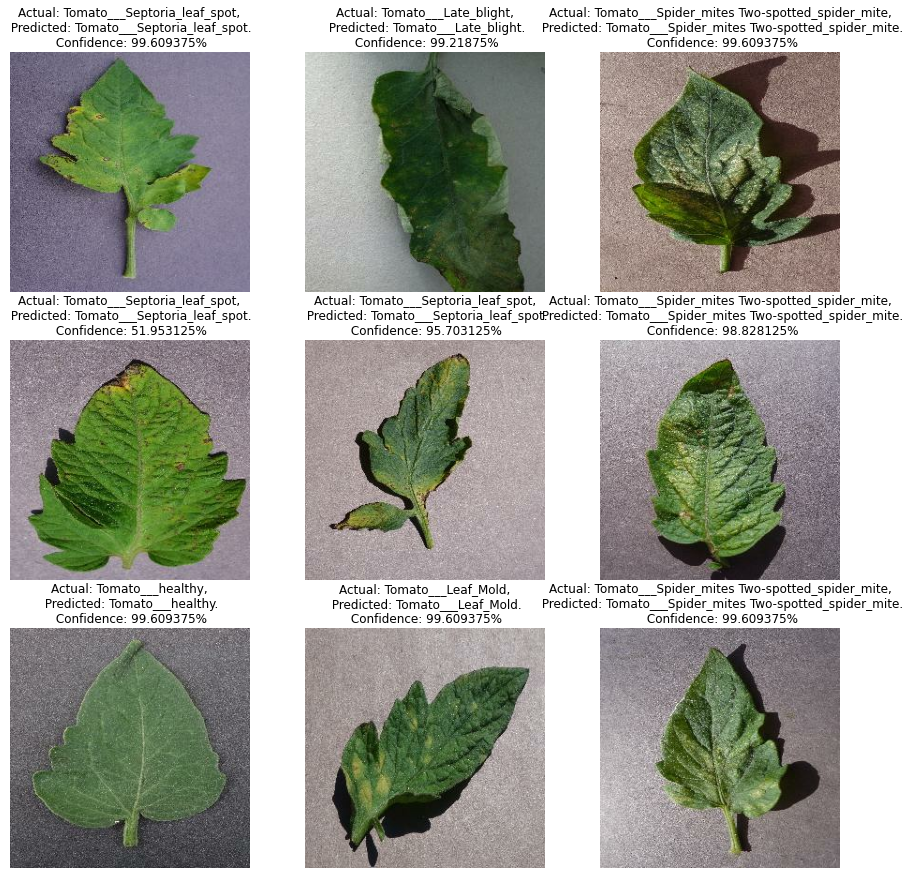

In [34]:
#testing the tflite model 
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))        

        actual_class = class_names[labels[i]]

        test_image = np.expand_dims(images[i], axis=0).astype(np.float32)
        interpreter.set_tensor(input_index, test_image)
        interpreter.invoke()
        output = interpreter.tensor(output_index)
        digit = np.argmax(output()[0])

        predicted_class = class_names[digit]
        confidence = np.max(output()[0])*100

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")


# References

> Why TensorFlow ? https://www.tensorflow.org

> What is keras ? https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras

> What is TensorFlow Lite ? https://www.tensorflow.org/lite/guide

> TensorFlow Lite example apps : https://www.tensorflow.org/lite/examples

> How does it work ? https://blog.tensorflow.org/2021/11/on-device-training-in-tensorflow-lite.html

> TF Lite documentation : https://www.tensorflow.org/lite

> Original notebook : https://www.kaggle.com/code/balasubramaniamv/cnn-model-into-tf-lite-model

> Dataset : https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf

> Image : https://miro.medium.com/max/1200/1*xjsEPItNww_khr8o2me-xg.png

# Useful ressources 

> Installation : https://www.tensorflow.org/install

> How to use ? https://www.tensorflow.org/lite/tutorials


<center>
    <h2 style="color:#313658"> Thanks for reading 👍 </h2>


<center> 
    <h2 style="color:#313658"> If you have any feedback, please let me know! </h2>